# Imports

In [5]:
from numpy.random import seed
seed(888)
tf.random.set_seed(404)


In [234]:
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10 #importing data from keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout # for creating layers 
from keras.callbacks import TensorBoard 

from time import strftime # for date time

from IPython.display import display
# from tensorflow.keras.utils import array_to_imgo_img #for img visual not 

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import itertools # for iteration problem

%matplotlib inline

# Constants

In [220]:
LOG_DIR = "tensorboard_cifar_logs/"

LABEL_NAMES = ["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the data

In [7]:
# data is in the form of train and test dataset 
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [10]:
type(cifar10) # it's a module
type(x_train_all)

numpy.ndarray

# Explore the data

In [206]:
# Two methos to display data 1) using IPython display
x_train_all[0]

array([0.231, 0.243, 0.247, ..., 0.482, 0.361, 0.282])

In [45]:
"""
# view image using array_to_img
pic = array_to_img(x_train_all[0])
img.show()
"""

'\n# view image using array_to_img\npic = array_to_img(x_train_all[0])\nimg.show()\n'

In [87]:
y_train_all.shape

(50000, 1)

In [89]:
y_train_all[7][0]

7

In [91]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

In [ ]:
# View image using matplotlib
plt.imshow(x_train_all[7])
plt.show()

In [ ]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]])
plt.show()

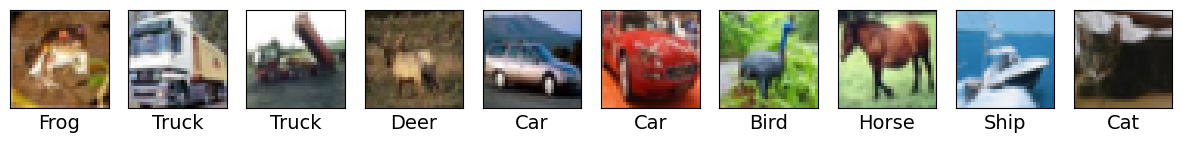

In [51]:
# firsst 10 images in our dataset
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([]) # to remove tick marks
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])

In [52]:
x_train_all[0].shape

(32, 32, 3)

In [13]:
nr_images, x,y,c = x_train_all.shape
print(f"images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}")

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [14]:
type(x_train_all[0][0][0][0]) # 8 bit unsigned integer 

numpy.uint8

In [11]:
# divide by 255 (rgb extrime value) to reduce size and convesre from integer to float
# dividing because of learning rate because learning rate is small making easy to culculate loss and adjusting weight
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [18]:
print(type(x_train_all[0][0][0][0]))
x_train_all[0][0][0][0]

<class 'numpy.float64'>


0.23137254901960785

In [23]:
# Flattening using numpy
x_train_all = x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)

In [25]:
x_train_all.shape

(50000, 3072)

In [27]:
# Flattening using numpy
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f"Shape of x_test is {x_test.shape}")

Shape of x_test is (10000, 3072)


In [26]:
type(y_train_all)

numpy.ndarray

# Create Validation Dataset

In [29]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [31]:
# Test data
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Create a samll dataset (for illustration)

In [33]:
# To train in a small dataset before moving to large
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

In [35]:
x_train_xs.shape

(1000, 3072)

# Define neural network though keras

In [89]:
# Units = number of neurons, input_dim = input dimension , activation = type of activation
model_1 = Sequential([
    Dense(units = 128, input_dim= TOTAL_INPUTS, activation= "relu",
         name = "m1_hidden1"),
    Dense(units = 64, activation = "relu", name = "m2_hidden2" ),
    Dense(units = 16, activation = "relu", name = "m3_hidden3"),
    Dense(units = 10, activation = "softmax", name = "m1_output1")
])

# complie to create a graph (calculations we are doing)
# calculating losse (Categorical cross entropy)
# an optimizer of two arguments required for compiling keras
# An optimizer calculate lss and optimize weight
model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy"
                , metrics=["accuracy"])

## Creating second model (using dropuout) 
### To stop overfitting

In [91]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_2.add(Dense(units = 128, activation= "relu", name = "m2_hidden1"))
model_2.add(Dense(units = 64, activation = "relu", name = "m2_hidden2"))
model_2.add(Dense(units = 16, activation = "relu", name = "m2_hidden3"))
model_2.add(Dense(units = 10, activation = "softmax", name = "m2_output"))

model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy"
                , metrics=["accuracy"])

In [87]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed = 42, input_shape = (TOTAL_INPUTS,)))
model_3.add(Dense(units = 128, activation= "relu", name = "m3_hidden1"))
model_3.add(Dropout(0.25, seed = 42))
model_3.add(Dense(units = 64, activation = "relu", name = "m3_hidden2"))
model_3.add(Dense(units = 16, activation = "relu", name = "m3_hidden3"))
model_3.add(Dense(units = 10, activation = "softmax", name = "m3_output"))

model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy"
                , metrics=["accuracy"])

In [39]:
type(model_1)

keras.engine.sequential.Sequential

In [41]:
 # What our model looks like
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output1 (Dense)          (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 128 = bias, 32*32*3 = activation point
32*32*3*128

393216

# TensorBoard (Visualising learning)

In [43]:
# Creating folder for TensorBoard
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%I %M")}'
    # joining log directory with folder name, this will create a path for us
    dir_paths = os.path.join(LOG_DIR, folder_name)
    # making directory using path
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created directory")
    
    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [47]:
# Creating batchseixe
samples_per_batch = 1000

In [65]:
%%time
# Fitting our small training dataset
nr_epochs = 150 # number of epochs
model_1.fit(x_train_xs, y_train_xs,epochs=nr_epochs, batch_size = samples_per_batch, 
            callbacks=[get_tensorboard("Model 1")], verbose=0, validation_data=(x_val, y_val))
# Verbose remove the data stat
# validation_data (data that our model has not seen) pased as tuple
"""If we want to compare diffrent runs from scratch run instead of adding to them we have
to refresh the neural networkcode"""

Successfully created directory
CPU times: total: 3min 9s
Wall time: 55.6 s


'If we want to compare diffrent runs from scratch run instead of adding to them we have\nto refresh the neural networkcode'

In [85]:
%%time
nr_epochs = 150 
model_2.fit(x_train_xs, y_train_xs,epochs=nr_epochs, batch_size = samples_per_batch, 
            callbacks=[get_tensorboard("Model 2")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 4min 10s
Wall time: 1min 58s


In [93]:
%%time
nr_epochs = 100 
model_1.fit(x_train, y_train,epochs=nr_epochs, batch_size = samples_per_batch, 
            callbacks=[get_tensorboard("Model 1 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 9min 53s
Wall time: 3min 25s


In [95]:
%%time
nr_epochs = 100 
model_2.fit(x_train, y_train,epochs=nr_epochs, batch_size = samples_per_batch, 
            callbacks=[get_tensorboard("Model 2 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 21min 56s
Wall time: 6min 2s


In [97]:
%%time
nr_epochs = 100 
model_3.fit(x_train, y_train,epochs=nr_epochs, batch_size = samples_per_batch, 
            callbacks=[get_tensorboard("Model 3 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 22min 31s
Wall time: 6min 19s


# Prediction on individual images

In [100]:
x_val[0].shape

(3072,)

In [102]:
# Using np to make the array 2D
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [110]:
# precision of value
np.set_printoptions(precision=3)

In [146]:
# Using prediction
prediction_1 = model_2.predict(test)
# .predict.sum() should be equal to zero

1/1 [==============================] - 0s 37ms/step


In [152]:
# If we want to predict more than one image
predictions = model_2.predict(x_val)
print(predictions.shape)
# 10 probability for each 10000 images

313/313 [==============================] - 1s 4ms/step
(10000, 10)


In [144]:
# largest number of 10, not working, so using np.argmax
predicted_classes = np.argmax(prediction, axis=1)
print(predicted_classes)

[6]


In [136]:
y_val[0]

array([6], dtype=uint8)

In [160]:
# Predicting 10 images 
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predictions = model_2.predict(test_img)
    predicted_classes = np.argmax(predictions, axis=1)
    print(f"Actual values: {y_val[number][0]} vs. predicted: {predicted_classes}")

1/1 [==============================] - 0s 39ms/step
Actual values: 6 vs. predicted: [6]
1/1 [==============================] - 0s 67ms/step
Actual values: 9 vs. predicted: [1]
1/1 [==============================] - 0s 66ms/step
Actual values: 9 vs. predicted: [9]
1/1 [==============================] - 0s 66ms/step
Actual values: 4 vs. predicted: [6]
1/1 [==============================] - 0s 64ms/step
Actual values: 1 vs. predicted: [0]
1/1 [==============================] - 0s 68ms/step
Actual values: 1 vs. predicted: [9]
1/1 [==============================] - 0s 67ms/step
Actual values: 2 vs. predicted: [2]
1/1 [==============================] - 0s 65ms/step
Actual values: 7 vs. predicted: [7]
1/1 [==============================] - 0s 68ms/step
Actual values: 8 vs. predicted: [8]
1/1 [==============================] - 0s 67ms/step
Actual values: 3 vs. predicted: [7]


# Evaluation

In [167]:
model_2.metrics_names

['loss', 'accuracy']

In [171]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f"Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}")

313/313 [==============================] - 2s 6ms/step - loss: 1.4294 - accuracy: 0.4961
Test loss is 1.43 and test accuracy is 49.6%


# Confusion matrix

In [186]:
predict = model_2.predict(x_test)
predict_classes = np.argmax(predict, axis=1)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict_classes)
conf_matrix.shape

313/313 [==============================] - 1s 4ms/step


(10, 10)

In [188]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [190]:
print(conf_matrix.max())
print(conf_matrix.min())

650
1


In [236]:
conf_matrix[0]

array([650,  15,  72,  16,  25,  13,  18,  26, 138,  27], dtype=int64)

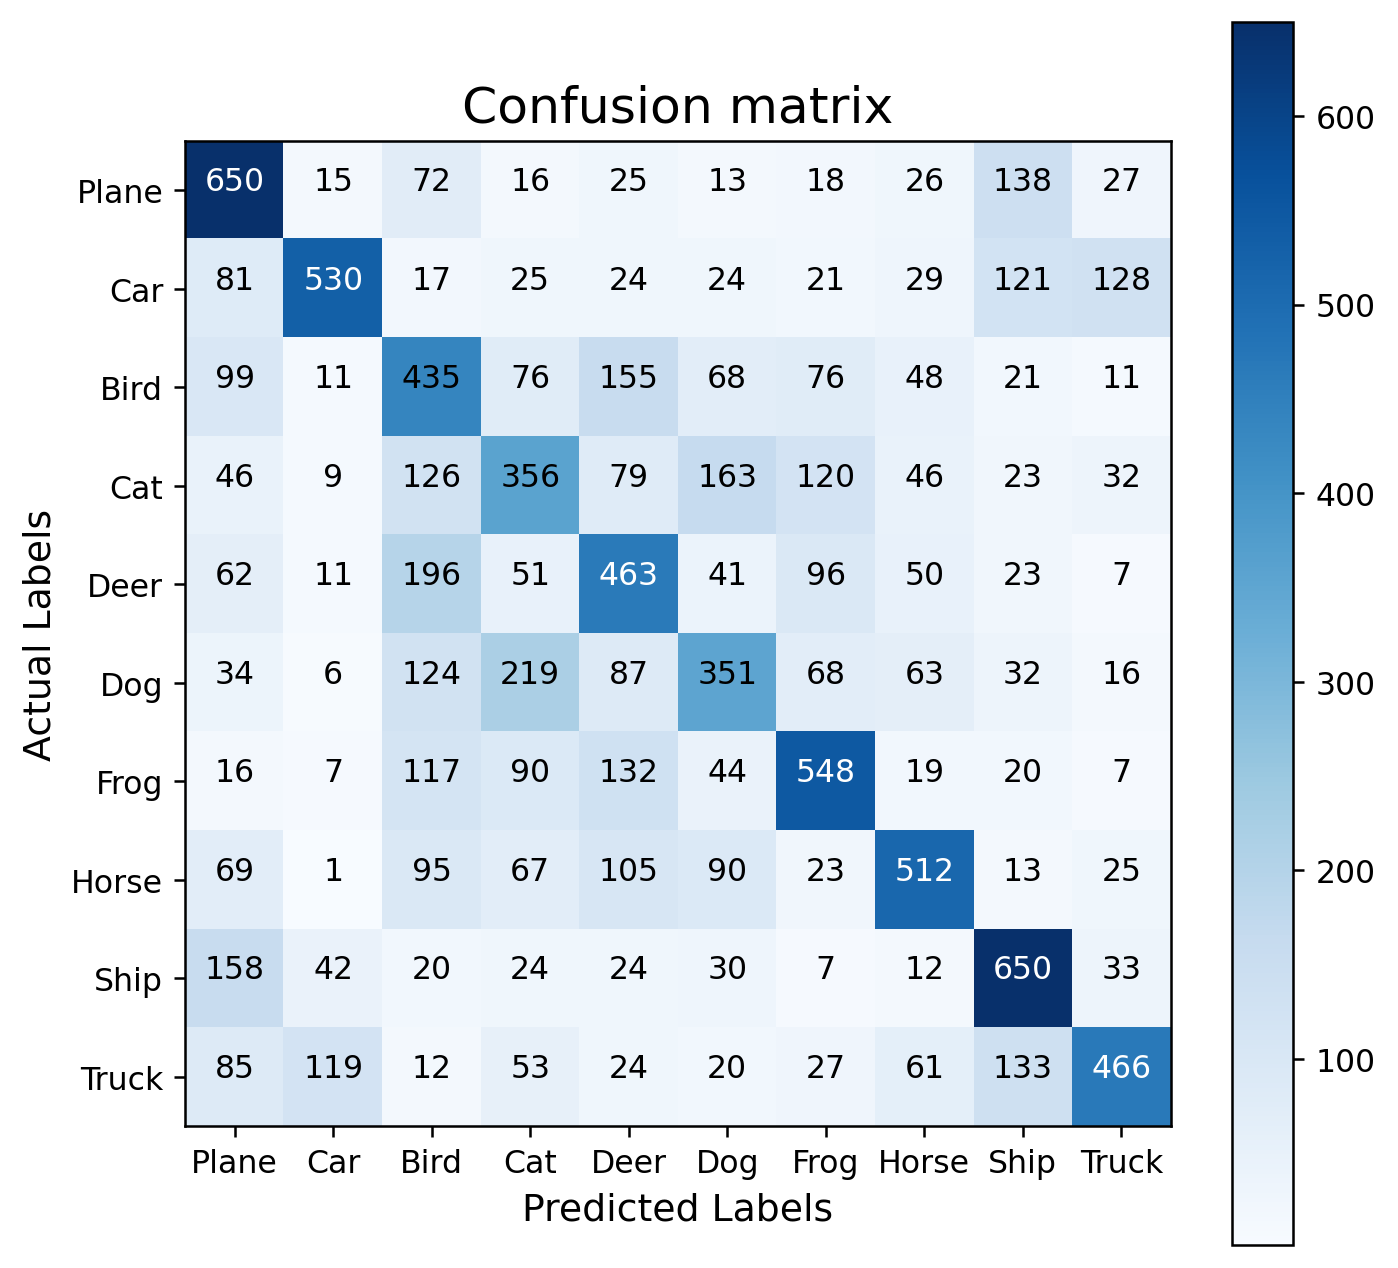

In [246]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title("Confusion matrix", fontsize=16)
plt.ylabel("Actual Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i,j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment="center", 
            color="white" if conf_matrix[i,j]>450 > conf_matrix.max()/2 else "black")

plt.show()

In [248]:
# True Positive
np.diag(conf_matrix)

array([650, 530, 435, 356, 463, 351, 548, 512, 650, 466], dtype=int64)

In [254]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.65 , 0.53 , 0.435, 0.356, 0.463, 0.351, 0.548, 0.512, 0.65 ,
       0.466])

In [256]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.5  , 0.706, 0.358, 0.364, 0.414, 0.416, 0.546, 0.591, 0.554,
       0.62 ])

In [258]:
avg_recall = np.mean(recall)
avg_recall

0.49610000000000004

In [260]:
avg_precision = np.mean(precision)
avg_precision 

0.5068819511861058

In [274]:
f_score = 2 * (avg_precision * avg_recall ) / (avg_precision + avg_recall)
f_score

0.5014330231686638